# Plot the oscillations in the Torus Demo

Run torus.prg with the following trace:

```
log on                    
logname "TorusSprites.txt"
tr store D000 D001        
tr store 0e76 0e77        
tr store 0a67 0a67        
tr store 0a69 0a69        
```

Extract the x and y positions used for Sprite 0. Updates to the oscillator values are used to split them into distinct sequences.

In [9]:
log_file = "TorusSprites.txt"
input_file = open(log_file,'r')
graphs_raw = []
coords = []
for l in input_file.readlines():
    
    if "0e77" in l:
        if coords:
            graphs_raw += [coords]
        coords = []
        continue

    if not "$D0" in l:
        continue

    if "$D000" in l:
        x = int(l[40:42],16)
        continue
        
    if "$D001" in l:
        y = int(l[40:42],16)
        coords += [(x,y)]
        continue
    
len(graphs_raw[5])


192

Write each sequence to its own file for use by latex `\addplot`

In [22]:
for i,g in enumerate(graphs_raw[1:35]):
    with open(f"../src/torus/Oscillation{i}.dat",'w') as ofile:
        ofile.write("x\ty\n")
        for x,y in g:
            ofile.write(f"{x/2}\t{y}\n")


In [2]:
"""
spritePositionArray   .BYTE $40,$46,$4C,$52,$58,$5E,$63,$68
                      .BYTE $6D,$71,$75,$78,$7B,$7D,$7E,$7F
                      .BYTE $80,$7F,$7E,$7D,$7B,$78,$75,$71
                      .BYTE $6D,$68,$63,$5E,$58,$52,$4C,$46
                      .BYTE $40,$39,$33,$2D,$27,$21,$1C,$17
                      .BYTE $12,$0E,$0A,$07,$04,$02,$01,$00
                      .BYTE $00,$00,$01,$02,$04,$07,$0A,$0E
                      .BYTE $12,$17,$1C,$21,$27,$2D,$33,$39
                      .BYTE $FF                            

"""
positions = [
'40','46','4C','52','58','5E','63','68',
'6D','71','75','78','7B','7D','7E','7F',
'80','7F','7E','7D','7B','78','75','71',
'6D','68','63','5E','58','52','4C','46',
'40','39','33','2D','27','21','1C','17',
'12','0E','0A','07','04','02','01','00',
'00','00','01','02','04','07','0A','0E',
'12','17','1C','21','27','2D','33','39',
]

In [37]:
for r in range(0, 24):
    with open(f"../src/torus/OscillationRaw-{r}.dat",'w') as ofile:
        ofile.write("x\ty\n")
        for i, p in enumerate(positions):
            x = int(p,16) + 0x68
            y = positions[(i + r) % len(positions)]
            y = int(y, 16) + 0x40
            ofile.write(f"{x}\t{y}\n")


In [72]:
import random
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

def createGraph(xys):
    x,y = zip(*xys)
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.plot(x,y)
    ax.grid(which="both")
    minor_ticks = np.arange(0, 255, 5)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(minor_ticks, minor=True)
    ax.grid(which='minor', alpha=0.6)
    return fig



<ipython-input-72-cb53d6dd129f>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


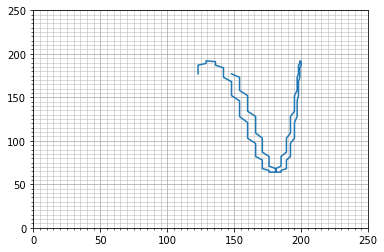

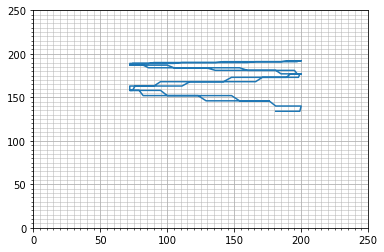

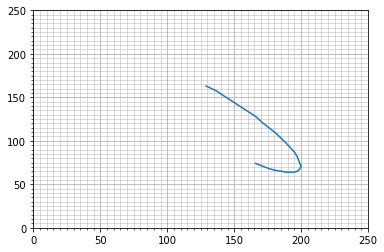

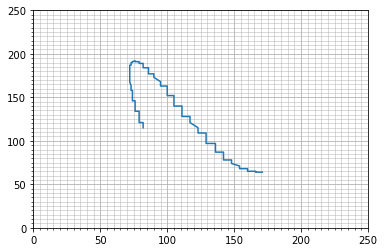

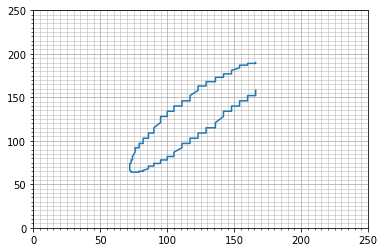

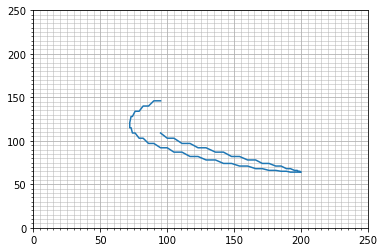

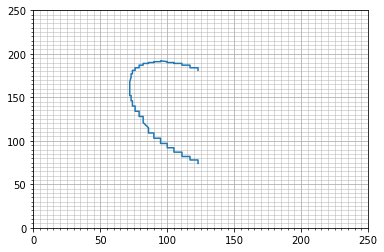

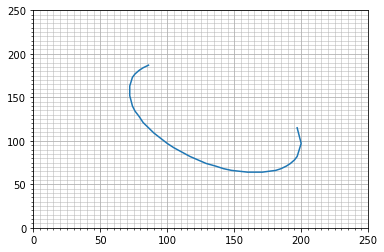

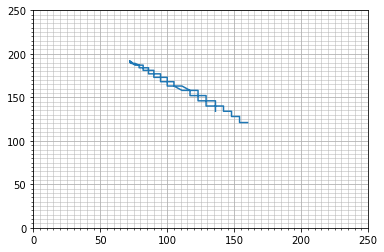

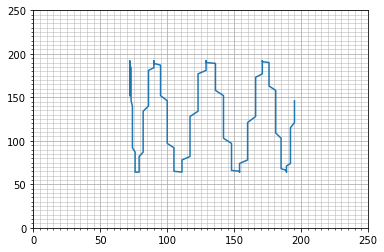

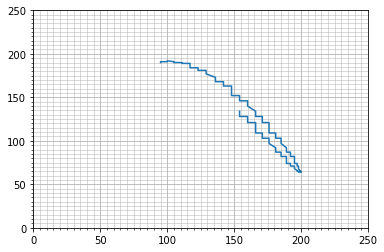

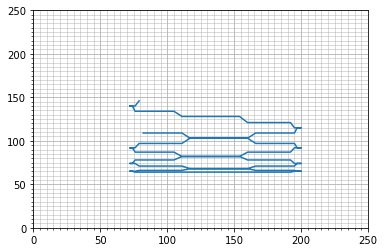

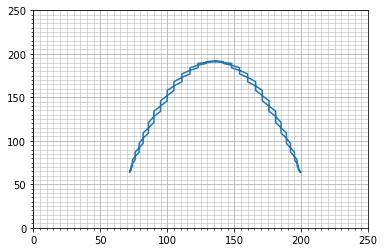

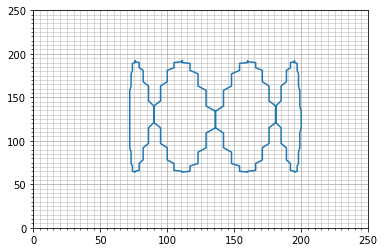

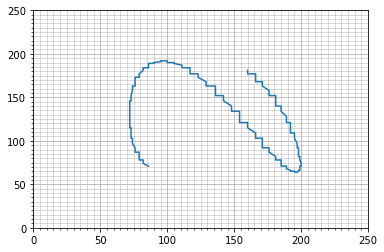

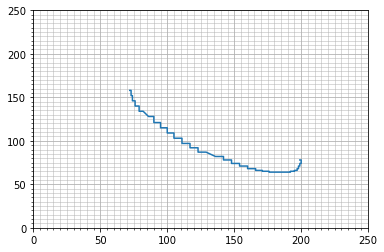

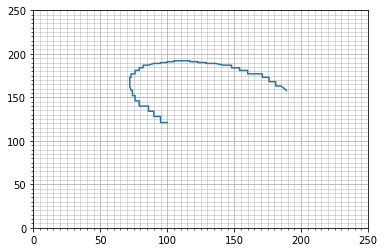

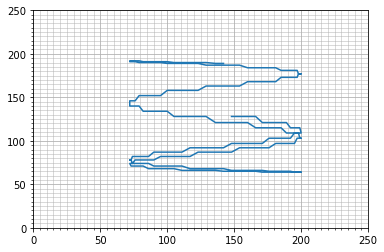

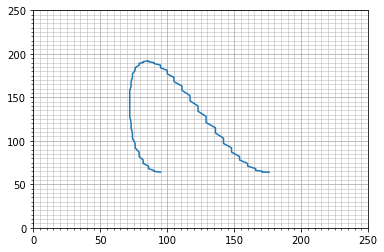

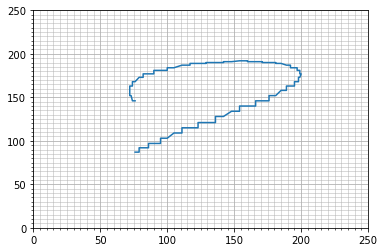

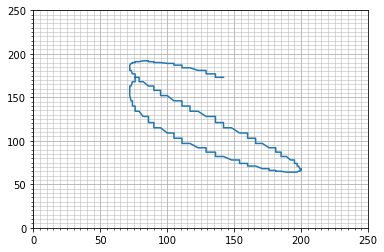

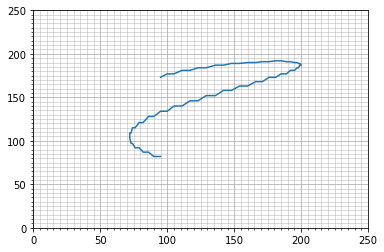

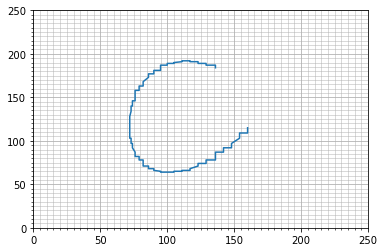

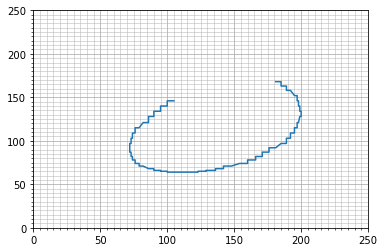

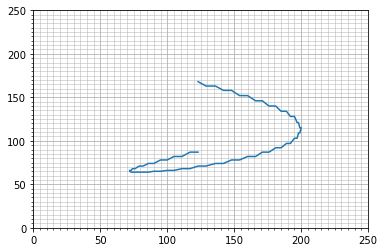

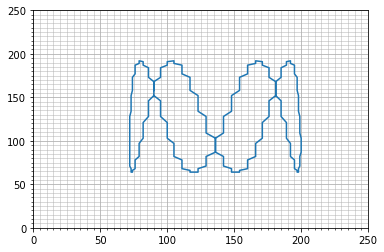

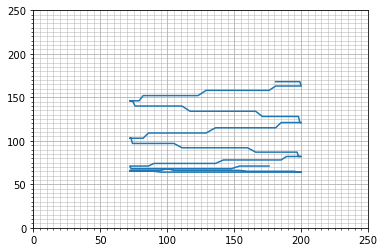

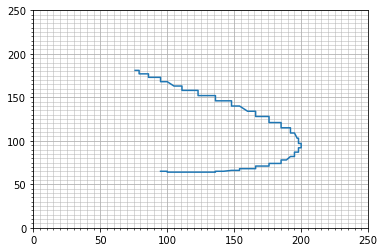

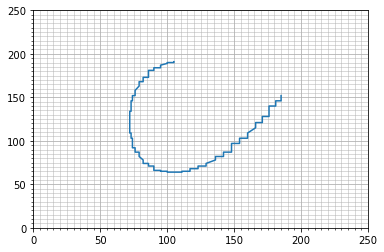

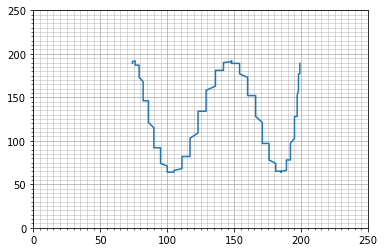

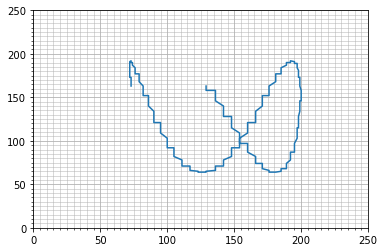

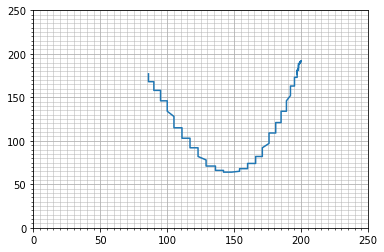

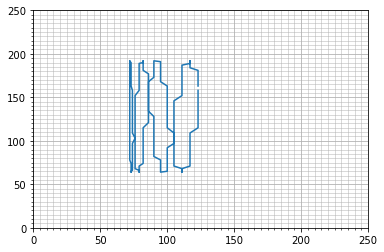

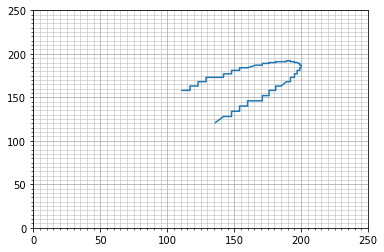

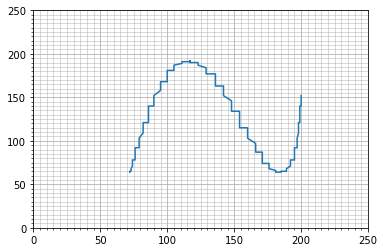

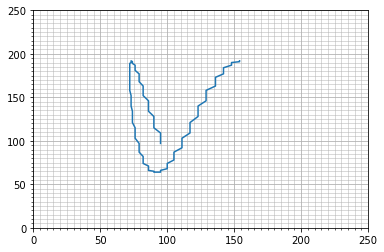

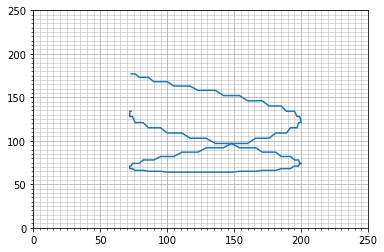

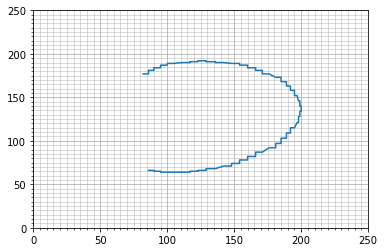

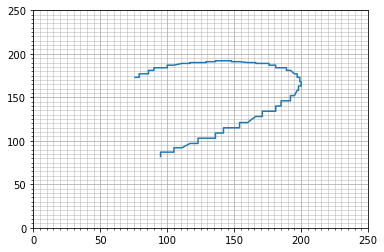

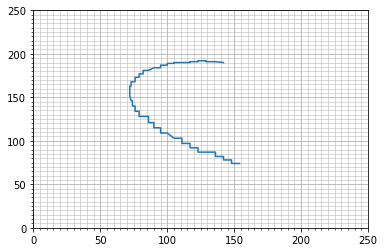

In [73]:
array_len = len(positions)

plts = []
for r in range(0, 40):
    x_counter_init = random.randint(1,9)
    x_counter = x_counter_init
    y_counter_init = random.randint(1,9)
    y_counter = y_counter_init
    xoffset = random.randint(1,array_len)
    yoffset = random.randint(1,array_len)
    xys = []
    for i in range(0,256):
        y_counter -= 1
        if not y_counter:
            y_counter = y_counter_init
            yoffset += 1
        x_counter -= 1
        if not x_counter:
            x_counter = x_counter_init
            xoffset += 1
        x = positions[xoffset % len(positions)]
        x = int(x,16) + 0x48
        y = positions[yoffset % len(positions)]
        y = int(y, 16) + 0x40
        xys += [(x,y)]
    fig = createGraph(xys)
    fig.savefig(f"../src/torus/OscillationTest{r}.png")
